# Introduction to Data Analysis
Data Analysis is loosely defined as the process of taking data and turning it into some useful information which enables data-driven decision-making. A skilled data analyst can  
- gather data from a wide variety of sources
- combine different data sets into a common dataset
- clean the data of bad observations
- take into account outliers and know when to ignore them
- communicate with decision makers to discover business needs and data owners to understand nuances of the data set
- provide aggregated metrics and graphics to showcase collected data 

In this course, we attempt to teach the basics of the above-mentioned skills. However, the tools used to perform these tasks vary widely from individual packages within a programming language, to entire frameworks that integrate multiple technologies together. The exact selection used will depend on your workflow, business needs, and available software. We focus on the Pandas library for Python for 2 major reasons: 
1. Python is open-source and completely free to use. Anyone can download it, write some code, and start a workflow without being charged a dime. Additionally, Python has a vast community of users, meaning it is very easy to obtain help from other users and find teaching resources (though books, classes, or video courses). 
2. Pandas strength lies in its `DataFrame` class. These act like excel or SQL tables that you can use to build graphs, combine datasets, compute metrics, or extract individual observations. This reduces the complexity of the tasks we explore and increases visibility into the actual processes as they happen. 

In this lesson, we will focus on some of the most fundamental tasks needed for Data Analysis. Specifically, we will 
1. collect a dataset,
2. read that dataset into python, 
3. perform some basic manipulation,
4. and plot a basic graphic, 

## Fundamentals of Data analysis
The following diagram depicts a common workflow for data analysis.  

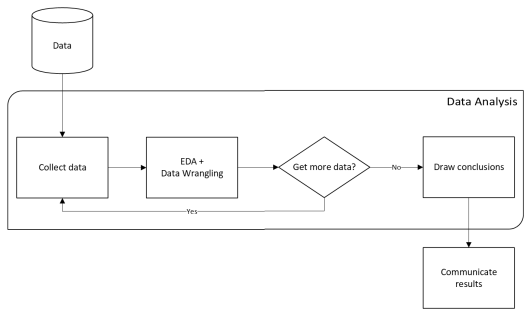

*Image credits: (Molin, 2019)*

Let's take these nodes and discuss what each means. 

### Data Collection
The first step in any data analysis process should be data collection. There are many sources from which to collect data. These different sources will also take different formats. Some questions you will have to ask yourself are 
- What questions am I trying to answer? 
- How was the data collected? 
- What kind of changes need to be made to fit my needs?
- Do I need to combine the multiple datasets to get a fuller picture?
- Who has the data that can answers those questions?
- How do I access the data? 
- Are there any rules tied to the data that I need to follow?

These are a small sampling of some important questions that you may need to ask before starting your project. Ensuring that these questions (and potentially many others) will guide the project as a while. This will determine what resources are available, which datasets can be used, and will help avoid running into last minute snags that could put a deadline at risk. Once these questions have been answered, we can start gathering the data. 

The most common data sources include databases, flat files (think csv or excel files), APIs, and web pages. Python has a variety of libraries available to access each of these formats, with some of them overlapping to a degree. 
- Databases can be accessed either by some specific driver for that database or by a package that connects to all databases like SQLAlchemy. This package may require that you install other packages as you connect to specific databases, but the error messages you get will specify what else you need. 
- When dealing with flat files, Pandas is likely your best option, however it can also read data in from databases. This functionality depends on SQLAlchemy, but is a bit more specific to just reading data, whereas SQLAlchemy can perform all database actions (including table creation or deletion, inserting or updating data, in addition to executing queries or stored procedures). These other tasks may be critical to a data analysis workflow, however, this is well beyond the scope of this course.
- For API's and web pages, python ships with a package called `requests` to perform HTTP calls, though others have been created. An example could be gathering cryptocurrency prices from [CoinCap](https://docs.coincap.io/) through a api call like [this one](https://api.coincap.io/v2/assets). Querying this API returns a JSON formatted string that you could store into a pandas dataframe to then filter, aggregate, or generate other metrics. Another way of using `requests` would be to read in a html page which contains an embedded table, which can be parsed out and stored to a dataframe, just like the the json string from the previous example. 

There is a bit of overlap with all of these methods, but most workflows will likely converge to a point where Pandas is being used to store and manipulate the data in memory, at least until it is dumped or stored somewhere, like in a file or database. 

Let's practice downloading a dataset from a website. The [New York Times (2021)](https://github.com/nytimes/covid-19-data) maintained a dataset of COVID-19 cases until March 24, 2023. We are going to use the `read_csv` function provided by Pandas to read the CSV directly from the url. 

The first thing we need to do is import `pandas` into our code.

In [1]:
import pandas as pd

Now that we have pandas available, we can call the function, which is show on the second line in the cell below. We need to pass in the url to tell pandas what csv to turn into a dataframe. Note that either the value could instead be the path to a file on your local computer. 

In [11]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
file_name = 'raw.githubusercontent.com_nytimes_covid-19-data_master_us-states.csv'
table = pd.read_csv(file_name)
table

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485


It is also important to read whatever documentation that comes with your data. For example, the source hosts data at different geographic resoutions ranging from individual counties all the way up to country-wide. We'll take the state as I don't need such a fine grain, but I would like to compare some of the different regions in the United States. It might be important to read up on how they did their counting, or what the different columns mean. This data would be critical in helping me answer the questions I mentioned above.

### Data Wrangling
Data Wrangling or Data Cleaning is the process of taking the data from an unusable form into one that you can start to answer questions with. This is one of the most critical steps for 2 major reasons. 
1. It is very likely that you will *not* find the perfect data set that is ready for your use the moment you pick it up. You will likely have to do some reformatting, filtering, or aggregating to get the data to a state in which is ready to be used for your specific use case. Remember that someone else has likely gathered the data (especially when working at Summit) and had different needs when they gathered the data. 
2. Many things can happen when collecting (or storing) the data. Human error can cause typos to be recorded in place of the real value. Values may be missing for optional questions on surveys. Unconventional formats may have been used even if the data is correct. All of these things need to be corrected or standardized. 

Even though it may be one of the least enjoyable parts, data wrangling is an absolutely critical step of the process as it allows for more accurate reporting of the data and the underlying trends that can be found in the data. 

Using the COVID-19 dataset we just downloaded, let's compare data from only two states. For this example, we'll examine some numbers for North Carolina and Utah.

In [3]:
filter_map = [value in ["North Carolina", "Utah"] for value in table.state]
table = table[filter_map]
table

,date,state,fips,cases,deaths
199,2020-02-25,Utah,49,1,0
208,2020-02-26,Utah,49,1,0
217,2020-02-27,Utah,49,1,0
227,2020-02-28,Utah,49,1,0
237,2020-02-29,Utah,49,1,0
...,...,...,...,...,...
61822,2023-03-21,Utah,49,1091984,5309
61865,2023-03-22,North Carolina,37,3481732,29746
61878,2023-03-22,Utah,49,1091984,5309
61921,2023-03-23,North Carolina,37,3481732,29746


Often times, you will end up with more data than is necessary. This could mean things like either extra columns or rows.  In the previous example, we showed an example of how to filter out rows that we don't want. Below, we will show an example of how to drop the `fips` column, which for our case can be considered duplicate information.

In [4]:
table = table.drop("fips", axis=1)
table

,date,state,cases,deaths
199,2020-02-25,Utah,1,0
208,2020-02-26,Utah,1,0
217,2020-02-27,Utah,1,0
227,2020-02-28,Utah,1,0
237,2020-02-29,Utah,1,0
...,...,...,...,...
61822,2023-03-21,Utah,1091984,5309
61865,2023-03-22,North Carolina,3481732,29746
61878,2023-03-22,Utah,1091984,5309
61921,2023-03-23,North Carolina,3481732,29746


### Exploratory Data Analysis
Humans are much more adept at understanding information when displayed in some sort of visual medium. Therefore, plotting the data in some way is critical to the data cleansing and preparation process. 


Depending on the data, you may get clues that more data is needed, that more cleaning need to be done, or that maybe you need to undo some processes previously believed necessary. Much like every other part of data processing, the answer to these questions will depend on the exact dataset that is being used for a project.

For our example, let's plot the data as a time graph for the two states. 

In [5]:
grouped_data = table.groupby("state")

In [6]:
grouped_data.get_group("North Carolina")

,date,state,cases,deaths
277,2020-03-03,North Carolina,1,0
294,2020-03-04,North Carolina,1,0
314,2020-03-05,North Carolina,1,0
339,2020-03-06,North Carolina,2,0
370,2020-03-07,North Carolina,2,0
...,...,...,...,...
61697,2023-03-19,North Carolina,3477321,29712
61753,2023-03-20,North Carolina,3477321,29712
61809,2023-03-21,North Carolina,3477321,29712
61865,2023-03-22,North Carolina,3481732,29746


In [7]:
grouped_data.get_group("Utah")

,date,state,cases,deaths
199,2020-02-25,Utah,1,0
208,2020-02-26,Utah,1,0
217,2020-02-27,Utah,1,0
227,2020-02-28,Utah,1,0
237,2020-02-29,Utah,1,0
...,...,...,...,...
61710,2023-03-19,Utah,1091984,5309
61766,2023-03-20,Utah,1091984,5309
61822,2023-03-21,Utah,1091984,5309
61878,2023-03-22,Utah,1091984,5309


In [8]:
import matplotlib.pyplot as plt

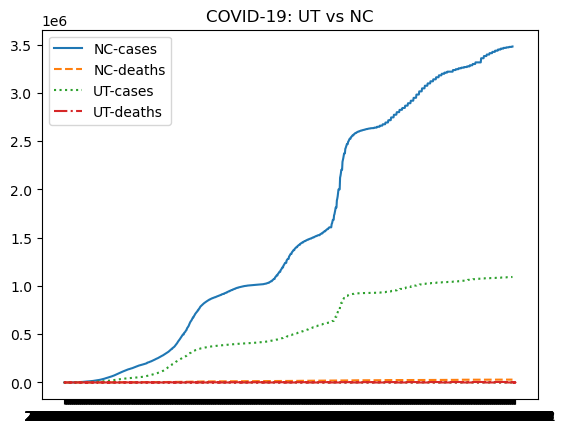

In [9]:
fig = plt.figure()
plt.title("COVID-19: UT vs NC")
plt.plot(
    grouped_data.get_group("North Carolina").date,
    grouped_data.get_group("North Carolina").cases,
    linestyle="solid", 
    label="NC-cases"
)
plt.plot(
    grouped_data.get_group("North Carolina").date,
    grouped_data.get_group("North Carolina").deaths, 
    linestyle="dashed",
    label="NC-deaths"
)
plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").cases, 
    linestyle="dotted", 
    label="UT-cases"
)
plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").deaths, 
    linestyle="dashdot", 
    label="UT-deaths"
)
plt.legend()
plt.show()

So, the next thing I would do after looking at this graph is plot it again. Notice the Y-Axis. Clearly, these four observations do not belong next to each other. the number of cases have absolutely skyrocketed in the past amount of time, leaving deaths in the absolute dust. If we want to have a good visual comparson, we absolutely need to separate these graphs further. 

C:\Users\tyler.whitaker\AppData\Local\Temp\ipykernel_39348\3119097930.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


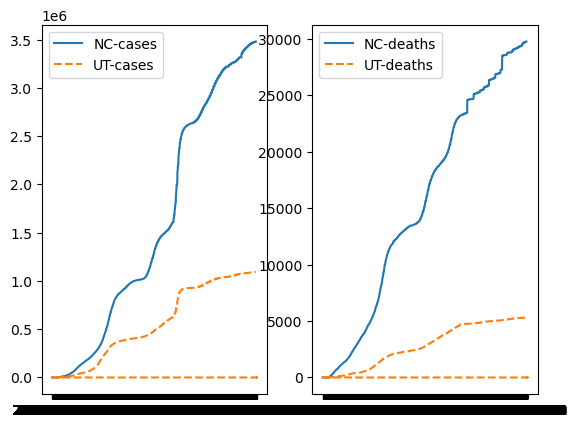

In [10]:
fig = plt.figure()
plt.title("COVID-19: UT vs NC")
plt.subplot(121)
plt.plot(
    grouped_data.get_group("North Carolina").date, 
    grouped_data.get_group("North Carolina").cases, 
    linestyle="solid",
    label="NC-cases"
)

plt.plot(
    grouped_data.get_group("Utah").date, 
    grouped_data.get_group("Utah").cases, 
    linestyle="dashed",
    label="UT-cases"
)

plt.legend()
plt.subplot(122)
plt.plot(
    grouped_data.get_group("North Carolina").date, 
    grouped_data.get_group("North Carolina").deaths,
    linestyle="solid",
    label="NC-deaths"
)

plt.plot(
    grouped_data.get_group("Utah").date,
    grouped_data.get_group("Utah").deaths, 
    linestyle="dashed", 
    label="UT-deaths"
)

plt.legend()
plt.show()

While each graph is much easier to read, we have still run into some other issues. Notice that the graphs for North Carolina are significantly higher than that of Utah. I want to point out again the scales on on the Y-Axis again. Placing these two graphs side now seems to imply that the number of cases and deaths are rising at similar rates, even though the numbers are clearly printed on the sides. While graphs can offer a very quick and intuitive sense of what the data is doing, you (as a data analyst or presenter) must be causious about what the picture is saying about your data. You can very quickly lead others (or even yourself) to certain conclusions that may not be completely acurate, even though the numbers themselves are true. 

This is why visualizing the data before actually performing anaysis is critical. It will help you determine what types of analysis needs to be performed, if any further cleaning or normalizing should be performed, if more data needs to be collected simply by being able to look at the data. 

For example, this graphic tells me that I should probably consider scaling these numbers by the total population of the respective states (North Carolina as over three times as many people as Utah). It tells me that I might need to find some Census data to find an accurate measurement of the population for each state.

One thing that I'm not worried about at this step however is how terrible my graphic looks. I recognize that this is simply a quick plot of the data. There are a lot of issues in design and acessability that would need much more work before this is presentable.

*Note: I have used MatPlotLib as the plotting libary in this example because that is what I'm most immedietly comfortable with, as that is what I was first taught. Pandas actually has plotting cabability stored as a method in the dataframe object. Do not feel the need to take full control over the graphics as I have done above. Simpler, less scary ways exist.*

### Drawing Conclusions
After iteratively collecting, cleaning, and preparing the data, we can finally reach the point where we start to ask questions about the data. Questions like 
- Do we notice any patterns or relationships in the data?
- Can we make accurate predictions using the data? 
- What kind of distributions do we see? 
- What kind of insights can we draw from the data (if any at all)?

Not all of these questions will be applicable, and sometimes, none of your questions can be answered at the current state. Having these questions in mind will help you determine what the next steps should be. Questions like 
- Should we build some sort of model for the data? 
- Do we need to collect more data?
- Do we need to drop this project and more to something else?

can be considered and answered at this point. 

## Closing Thoughts
Unfortunitely most of the work around data analysis will involve iterating over the data, preparing it before you can really do anything with it. Following the 80-20 rule that seems to loom over all that what we do, 80% of the work will be the preperation, and the last 20% will be the good stuff, where you can actually start to learn things about the data. Pandas is an exceptional tool in helping that first 80% run a little bit smoother. 

Citations:
- Molin, S. (2019). Hands-On Data Analysis with Pandas. Packt Publishing Ltd.
- The New York Times. (2021). Coronavirus (Covid-19) Data in the United States. Data added to code on 6/17/2022, from https://github.com/nytimes/covid-19-data.